In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# pytorchのデータセット
from torch.utils.data import Dataset,DataLoader
import math
%matplotlib inline

In [5]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


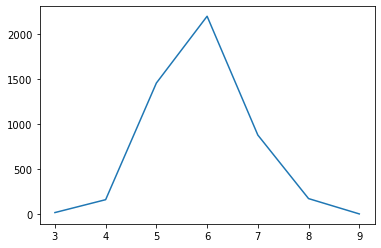

In [7]:
count_element=df.groupby('quality')['quality'].count()
plt.plot(count_element)

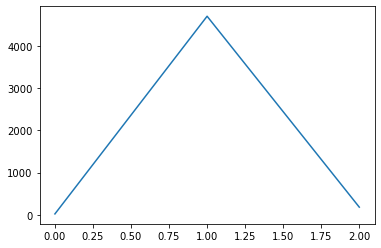

In [12]:
import collections 
a=collections.Counter(newlabel)
list_a=[]
for i in range(len(a)):
    list_a.append(a[i])

plt.plot(list_a)

## データセットクラス（ミニバッチ）

In [26]:
class WineDataset(Dataset):
    def __init__(self):
        df = pd.read_csv('winequality-white.csv',sep=';')
        X=df.drop('quality' ,axis=1).values
        
        # ラベルの加工
        y = df['quality'].values
        newlabel=[]
        for val in y:
            if val <= 3:
                newlabel.append(0)
            elif val <= 7:
                newlabel.append(1)
            else:
                newlabel.append(2)
        Y=newlabel
        
        X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.20, random_state=123) 
        
        self.X_data = torch.FloatTensor(X_train)
        self.X_test = torch.FloatTensor(X_test)
        self.Y_data = torch.LongTensor(Y_train)
        self.Y_test = torch.LongTensor(Y_test)
        
        self.num = len(self.Y_data)
        
    def __getitem__(self, index):
        return self.X_data[index], self.Y_data[index]
    
    def __len__(self):
        return self.num

## モデルの定義

In [31]:
class Model(nn.Module):
    def __init__(self, in_features=11, h1=8, h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features , h1)
        self.fc2 = nn.Linear(h1 , h2)
        self.fc3 = nn.Linear(h2 , out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [32]:
torch.manual_seed(3)
model = Model()
## 出力値が３つなので、CrossEntropyLoss (使う場合は、softmax関数を内部で処理しているため、ニューラルネットワークにsoftmax関数は使用しない)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [33]:
epochs=50
Batch_size = 500
loss_list = []

dataset = WineDataset()
trainloader = DataLoader(dataset=dataset, batch_size = Batch_size, shuffle=True)
total_samples = len(dataset)
print(total_samples)
n_iterations=math.ceil(total_samples/Batch_size)
print(n_iterations)



3918
8


In [34]:
for epoch in range(epochs):
    
    for i, data in enumerate(trainloader):
        
        X , Y = data
        print(f'epoch: {epoch+1}/{epochs}, iteration {i+1}/{n_iterations}, Inputs {X.shape}, Labels {Y.shape}')
        
        y_pred = model.forward(X.data)
        loss = criterion(y_pred, Y.data)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        loss_list.append(loss)
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} loss: {loss.item():4f}')

epoch: 1/50, iteration 1/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 1/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 1/50, iteration 3/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 1/50, iteration 4/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 1/50, iteration 5/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 1/50, iteration 6/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 1/50, iteration 7/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 1/50, iteration 8/8, Inputs torch.Size([418, 11]), Labels torch.Size([418])
epoch: 2/50, iteration 1/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 2/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 2/50, iteration 3/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 2/50, iteration 4/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoc

epoch: 16/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 16/50, iteration 3/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 16/50, iteration 4/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 16/50, iteration 5/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 16/50, iteration 6/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 16/50, iteration 7/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 16/50, iteration 8/8, Inputs torch.Size([418, 11]), Labels torch.Size([418])
epoch: 17/50, iteration 1/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 17/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 17/50, iteration 3/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 17/50, iteration 4/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 17/50, iteration 5/8, Inputs torch.Size([500, 11]), Labels torch.Size

epoch: 31/50, iteration 7/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 31/50, iteration 8/8, Inputs torch.Size([418, 11]), Labels torch.Size([418])
epoch: 32/50, iteration 1/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 32/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 32/50, iteration 3/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 32/50, iteration 4/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 32/50, iteration 5/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 32/50, iteration 6/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 32/50, iteration 7/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 32/50, iteration 8/8, Inputs torch.Size([418, 11]), Labels torch.Size([418])
epoch: 33/50, iteration 1/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 33/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size

epoch: 45/50, iteration 8/8, Inputs torch.Size([418, 11]), Labels torch.Size([418])
epoch: 46/50, iteration 1/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 46/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 46/50, iteration 3/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 46/50, iteration 4/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 46/50, iteration 5/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 46/50, iteration 6/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 46/50, iteration 7/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 46/50, iteration 8/8, Inputs torch.Size([418, 11]), Labels torch.Size([418])
epoch: 47/50, iteration 1/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 47/50, iteration 2/8, Inputs torch.Size([500, 11]), Labels torch.Size([500])
epoch: 47/50, iteration 3/8, Inputs torch.Size([500, 11]), Labels torch.Size

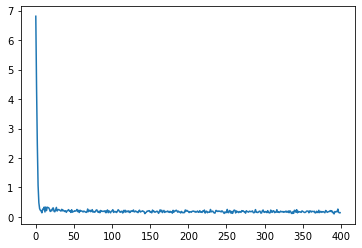

In [35]:
plt.plot(loss_list)

## 検証データを使って検証する

In [37]:
###  検証データでの損失
with torch.no_grad():
    predicted_y = model.forward(dataset.X_test)
    loss = criterion(predicted_y , dataset.Y_test)
    print(loss.item())

0.19895730912685394


In [45]:
###  検証データでの正解率
correct = 0
with torch.no_grad():
    for i ,data in enumerate(dataset.X_test):
        y_val = model.forward(data)
        if y_val.argmax().item() == dataset.Y_test[i]:
            correct += 1
print(f'{correct} out of {len(dataset.Y_test)} = {round(100*correct/len(dataset.Y_test), 2)}%')

936 out of 980 = 95.51%
